Mounted at /content/gdrive
--------------------Nash Equilibrium--------------------------
Iteration= 1, Reward: 0.1, Penalty: -1.0, Participants: 1
Iteration= 2, Reward: 0.1, Penalty: -0.9, Participants: 1
Iteration= 3, Reward: 0.1, Penalty: -0.8, Participants: 1
Iteration= 4, Reward: 0.1, Penalty: -0.7, Participants: 1
Iteration= 5, Reward: 0.1, Penalty: -0.6, Participants: 1
Iteration= 6, Reward: 0.1, Penalty: -0.5, Participants: 1
Iteration= 7, Reward: 0.1, Penalty: -0.4, Participants: 1
Iteration= 8, Reward: 0.1, Penalty: -0.3, Participants: 1
Iteration= 9, Reward: 0.1, Penalty: -0.2, Participants: 1
Iteration= 10, Reward: 0.1, Penalty: -0.1, Participants: 1
Iteration= 11, Reward: 0.1, Penalty: 0.0, Participants: 30
1: The optimal participant = 10, Reward= 0.1 and Penalty=  0.0 is the optimal 
participation_levels =  100.00%
----------------------------------------------------------
Iteration= 12, Reward: 0.2, Penalty: -1.0, Participants: 1
Iteration= 13, Reward: 0.2, Penalty: -0.9

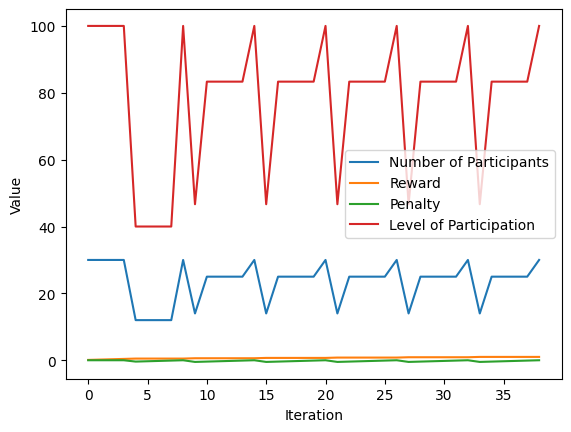

In [2]:
#with incentive mechanism
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd


class Leader:
    def __init__(self):
        # Define the reward and penalty ranges
        self.rewards = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        self.penalties = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0]
        #Generate all possible combinations
        self.combinations = list(itertools.product(self.rewards, self.penalties))


class Follower:
    def __init__(self, reputation_score, MAX, MIN):
        self.reputation_score = reputation_score
        self.decision_str = ""
        self.new_reputation_score=0.0
        self.max_reputation = 6
        self.min_reputation = 0

    def update_score(self, R,P):

        #method 1

        #self.new_reputation_score = round(self.reputation_score + R*(self.reputation_score/6) + P*(1 - self.reputation_score/6),0)

        #method 2
        R_newScore = round(self.reputation_score+R,0)
        P_newScore = round(self.reputation_score-P,0)
        R_newScore = min(self.max_reputation, max(self.min_reputation, R_newScore))
        P_newScore = max(self.min_reputation, min(self.max_reputation, P_newScore))

        if  R_newScore > P_newScore:
            x=1
        else:
            x=0

        self.new_reputation_score = round((self.reputation_score + x * R + (1-x) * P),1)

        self.new_reputation_score = min(self.max_reputation, max(self.min_reputation, self.new_reputation_score))

        if self.new_reputation_score >= self.reputation_score:
            self.decision_str = "cooperate"
        else: # self.new_reputation_score < self.reputation_score:
            self.decision_str = "defect"

        return self.reputation_score, self.new_reputation_score

def main():
    #mount the drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # Read the dataset file
    data= pd.read_csv('/content/gdrive/MyDrive/Thesis/GIE_Module/eFSPs_reputationScores.csv')

    min_reputation = 0
    max_reputation = 6

    follower_id = data["Provider_id"].tolist()
    reputation_scores = data["Reputation score"].tolist()

    max_followers = len(follower_id)

    optimal_participants = 10

    count=0
    leader = Leader()
    followers = [Follower(score, max_reputation, min_reputation) for score in reputation_scores]
    participation =0
    Rewards = []
    Penalties = []
    num_accepts = []
    participation_levels = []  # New list to store the level of participation
    print("--------------------Nash Equilibrium--------------------------")
    i=0

    for combo in leader.combinations:
        cooperate = 0
        R=combo[0]
        P=combo[1]

        i+=1
        for j, follower in enumerate(followers):
            old_score, new_score = follower.update_score(R,P)
            if follower.decision_str == "cooperate":
                cooperate += 1
            #print(f"p= {j+1}, current reputation {old_score:.2f}, potential reputation= {new_score:.2f}, decision= {follower.decision_str}")

        print(f"Iteration= {i}, Reward: {R}, Penalty: {P}, Participants: {cooperate}")

        if cooperate >= optimal_participants:
          Rewards.append(R)
          Penalties.append(P)
          num_accepts.append(cooperate)
          participation = (cooperate/max_followers) * 100
          participation_levels.append(participation)

          count+=1
          print(f"{count}: The optimal participant = {optimal_participants}, Reward= {R} and Penalty=  {P} is the optimal ")
          print(f"participation_levels =  {participation:.2f}%")
          print("----------------------------------------------------------")

    R_mean = np.mean(Rewards)
    R_median = np.median(Rewards)
    P_mean = np.mean(Penalties)
    P_median = np.median(Penalties)
    participation_levels_mean =np.mean(participation_levels)
    participation_levels_meadian =np.median(participation_levels)

    print(f"R-Mean =  {R_mean:.2f}, R-Median = {R_median:.2f} ")
    print(f"P-Mean =  {P_mean:.2f}, P-Median = {P_median:.2f} ")
    print(f"Mean-Participation level =  {participation_levels_mean:.2f}%")
    print(f"Median-Participation level =  {participation_levels_meadian:.2f}%")

    fig, ax = plt.subplots()
    ax.plot(range(len(num_accepts)), num_accepts, label="Number of Participants")
    ax.plot(range(len(Rewards)), Rewards, label="Reward")
    ax.plot(range(len(Penalties)), Penalties, label="Penalty")
    ax.plot(range(len(participation_levels)), participation_levels, label="Level of Participation")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Value")
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
--------------------Nash Equilibrium--------------------------
Iteration= 1: Participants: 12
1: The optimal participant = 12 with participation_levels =  40.00%
----------------------------------------------------------
Iteration= 2: Participants: 18
2: The optimal participant = 18 with participation_levels =  60.00%
----------------------------------------------------------
Iteration= 3: Participants: 17
3: The optimal participant = 17 with participation_levels =  56.67%
----------------------------------------------------------
Iteration= 4: Participants: 10
4: The optimal participant = 10 with participation_levels =  33.33%
----------------------------------------------------------
Iteration= 5: Participants: 14
5: The optimal participant = 14 with participation_levels =  46.67%
----------------------------------------------------------
Iteration= 6: Pa

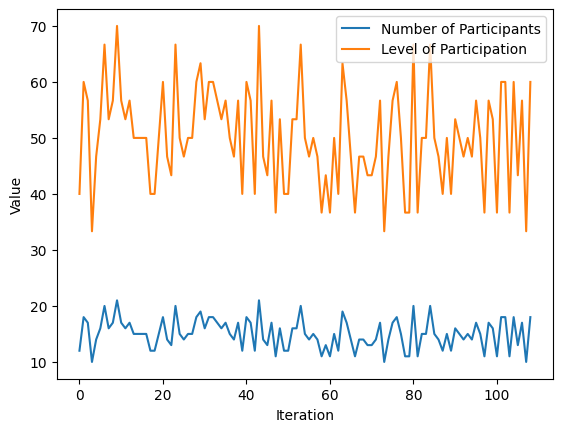

In [4]:
#non-incentie mechainsm
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd


class Follower:
    def __init__(self, reputation_score):
        self.reputation_score = reputation_score
        self.decision_str = ""

    def follower_decision(self):

        x = random.choice([0, 1])

        if  x == 1:
            self.decision_str = "cooperate"
        else:
            self.decision_str = "defect"


def main():
    #mount the drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # Read the dataset file
    data= pd.read_csv('/content/gdrive/MyDrive/Thesis/GIE_Module/eFSPs_reputationScores.csv')

    follower_id = data["Provider_id"].tolist()
    reputation_scores = data["Reputation score"].tolist()
    max_iterations = 110
    max_followers = len(follower_id)

    optimal_participants = 10


    count=0
    #leader = Leader()
    followers = [Follower(score) for score in reputation_scores]
    participation =0
    num_accepts = []
    participation_levels = []  # New list to store the level of participation
    print("--------------------Nash Equilibrium--------------------------")
    i=0

    for iteration in range(max_iterations):
        cooperate = 0
        i+=1
        for j, follower in enumerate(followers):
            follower.follower_decision()
            if follower.decision_str == "cooperate":
                cooperate += 1

            #print(f"eFSP= {j+1}, current reputation {follower.reputation_score:.2f}, decision= {follower.decision_str}")

        print(f"Iteration= {i}: Participants: {cooperate}")

        if cooperate >= optimal_participants:
          num_accepts.append(cooperate)
          participation = (cooperate/max_followers) * 100
          participation_levels.append(participation)
          count+=1
          print(f"{count}: The optimal participant = {cooperate} with participation_levels =  {participation:.2f}%")
          print("----------------------------------------------------------")

    total_participation_levels =np.mean(participation_levels)


    print(f"Participation level =  {total_participation_levels:.2f}%")

    fig, ax = plt.subplots()
    ax.plot(range(len(num_accepts)), num_accepts, label="Number of Participants")
    ax.plot(range(len(participation_levels)), participation_levels, label="Level of Participation")

    ax.set_xlabel("Iteration")
    ax.set_ylabel("Value")
    ax.legend()
    plt.show()
if __name__ == "__main__":
    main()
